In [1]:
!pip install textBlob
!pip install Levenshtein
import pandas as pd
from textblob import TextBlob
import networkx as nx
import Levenshtein
import random
import itertools
import re
import matplotlib.pyplot as plt


## Global Tweets - Flight Prices (30 March 2022)

In [2]:
df_twitter = pd.read_csv("indigo_delay")

In [3]:
df_twitter

,id,created_at,text,entities,screen_name
0,1169388289230430208,2019-09-04 23:14:28+00:00,RT @SameerKhan662: @mohammadyusuf26 Believe me...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",SameerKhan662
1,1169383508705366016,2019-09-04 22:55:29+00:00,"@dd310872 @indigo Hi, Devidutta. We truly unde...","{'hashtags': [], 'urls': [{'url': 'https://t.c...",IndiGo6E
2,1169380676447031296,2019-09-04 22:44:13+00:00,This is how Indigo compensates for the 7 hour ...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",tirthrshah
3,1169374646426206208,2019-09-04 22:20:16+00:00,@mohammadyusuf26 Believe me today if you searc...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",SameerKhan662
4,1169374080622923776,2019-09-04 22:18:01+00:00,"@HardeepSPuri @IndiGo6E @MoCA_GoI \nDear sir,\...","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NPYadav23531196
...,...,...,...,...,...
68,1158686777059577862,2019-08-06 10:30:29+00:00,@IndiGo6E No refreshments served in 3.5hours d...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",reshma86mul
69,1158631476813897729,2019-08-06 06:50:45+00:00,"Indigo 6E 134 pune to nagpur, departure was 11...","{'hashtags': [], 'urls': [{'url': 'https://t.c...",reshma86mul
70,1158569595579461633,2019-08-06 02:44:51+00:00,@IndiGo6E Thanks Pankaj. Little Indigo can do ...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",baraikmk
71,1158240906161471488,2019-08-05 04:58:45+00:00,@adiljal Delay of flight is come. Whenever i t...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",str_gzing


In [4]:
tweets_users = df_twitter['text'].tolist()

In [5]:
tweets_users

['RT @SameerKhan662: @mohammadyusuf26 Believe me today if you search indigo you will get pretty bad news about them...4 flights got delayed a…',
 '@dd310872 @indigo Hi, Devidutta. We truly understand what you must have felt. The delay was due to waterlogging and… https://t.co/NTGHG0QZZC',
 'This is how Indigo compensates for the 7 hour delay in flight by putting a note on boarding pass with no indication… https://t.co/J2bzhcSCIS',
 '@mohammadyusuf26 Believe me today if you search indigo you will get pretty bad news about them...4 flights got dela… https://t.co/1TkohJJEQP',
 '@HardeepSPuri @IndiGo6E @MoCA_GoI \nDear sir,\n   Around 1000 people waiting at Mumbai airport due to delay in indigo… https://t.co/bCFyFqvket',
 'Pathetic service from #Indigo @IndiGo6E date: 5/9/2019 flight no 6525 , 6 hours delay and no action from management… https://t.co/Z1KnEetFM8',
 "@ShreyaBagchi4 @indigo Hi, Shreya. We truly understand what you must have felt. There's been a delay due to waterlo… https://t

In [6]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial.sentiment
testimonial.sentiment.subjectivity

0.4357142857142857

In [10]:
testimonial = TextBlob(" I wish flight prices were lower!")
testimonial.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

## Tweets - Indigo + Delay (4,5 Sept 2019)

In [7]:
df_vistara_price = pd.read_csv("indigo_delay")

In [12]:
df_vistara_price

,id,created_at,text,entities,screen_name
0,1597275786779983872,2022-11-28 17:06:38+00:00,@HappyFaresindia I want to claim refund for my...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",JaiswaniMradul
1,1597252129411866625,2022-11-28 15:32:37+00:00,I cancelled a @IndiGo6E flight ticket 7 day ag...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",pratyushbhardw1
2,1596411505184223237,2022-11-26 07:52:17+00:00,@happyeasygo \nDear Sir\nHope you are doing we...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",devragoutam
3,1596074561636007936,2022-11-25 09:33:23+00:00,"I decided to just yolo and applied, i will boo...","{'hashtags': [], 'urls': [{'url': 'https://t.c...",jiminandme
4,1595397308757463042,2022-11-23 12:42:14+00:00,Applied for indigo private viewing like my Seo...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",noodlekooo
...,...,...,...,...,...
95,1557262716213276672,2022-08-10 07:08:58+00:00,@EaseMyTrip I booked a flight Flexi plus Indig...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",tanishbhargava
96,1556908518061395968,2022-08-09 07:41:31+00:00,So I booked the flight @IndiGo6E to Banglore f...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",dharamanyu
97,1555420822482743297,2022-08-05 05:09:57+00:00,RT @Muktpeeth: #गुडन्यूजमॉर्निंग #GoodNewsMorn...,"{'hashtags': [{'text': 'गुडन्यूजमॉर्निंग', 'in...",sushrushajadhav
98,1555417490813243392,2022-08-05 04:56:42+00:00,RT @Muktpeeth: #गुडन्यूजमॉर्निंग #GoodNewsMorn...,"{'hashtags': [{'text': 'गुडन्यूजमॉर्निंग', 'in...",TulsidasBhoite


In [13]:
tweets_users_vistara = df_vistara_price['text'].tolist()
tweets_users_vistara

['@HappyFaresindia I want to claim refund for my flight ticket, I cancelled this but refund is not initiated.\nReferen… https://t.co/YFviwmzbFu',
 'I cancelled a @IndiGo6E flight ticket 7 day ago but i still didn’t get my refund amount yet. I feel cheated from in… https://t.co/DwwKPWgjmY',
 '@happyeasygo \nDear Sir\nHope you are doing well,I booked flight ticket from BLR - BOM on 14 Nov’2022 which PNR no is… https://t.co/0wLh5kFJDl',
 'I decided to just yolo and applied, i will book flight ticket if i win but its not time yet \U0001f979 next time joon, i gue… https://t.co/nzpUtFnGui',
 "Applied for indigo private viewing like my Seoul flight ticket gonna buy itself but I've gotta shoot my shot",
 "I thought that there is no use of further talking to Indigo customer care when they don't have faith in customers a… https://t.co/wVbKxysEsl",
 'I booked a flight ticket from Rajahmundry - Bengaluru in Goibibo(Indigo). I entered my friend name incorrectly. So… https://t.co/O7twYFHXkp',
 'Ever

## Cleaning Twitter Data by removing duplicates and Hyperlinks

In [14]:
df = pd.DataFrame({
    "tweet":tweets_users_vistara
})

In [15]:
def compare(tweet1, threshold=0.7):
    # compare tweets using Levenshtein distance (or whatever string comparison metric) 
    matches = df['tweet'].apply(lambda tweet2: (Levenshtein.ratio(tweet1, tweet2) >= threshold))

    # get positive matches
    matches = matches[matches].index.tolist()

    # convert to list of tuples
    return [*zip(iter(matches[:-1]), iter(matches[1:]))]

# create graph objects
nodes = df.index.tolist()
edges = [*itertools.chain(*df["tweet"].apply(compare))]

# create graphs
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# get connected component indexes
grouped_indexes = [*nx.connected_components(G)]

# get a random choice index from each group
filtered_indexes = [random.choice([*_]) for _ in grouped_indexes]

df=df.loc[filtered_indexes]
x_removed_duplicates = df['tweet'].tolist()
df_cleaned = pd.DataFrame({'tweet' : x_removed_duplicates})

In [16]:
df_cleaned

,tweet
0,@HappyFaresindia I want to claim refund for my...
1,I cancelled a @IndiGo6E flight ticket 7 day ag...
2,@happyeasygo \nDear Sir\nHope you are doing we...
3,"I decided to just yolo and applied, i will boo..."
4,Applied for indigo private viewing like my Seo...
...,...
83,@IndiGo6E hey indigo booked flight from abudha...
84,Have you ever wondered how aviation turbine fu...
85,@EaseMyTrip I booked a flight Flexi plus Indig...
86,So I booked the flight @IndiGo6E to Banglore f...


In [17]:
removed_links = [re.sub(r"http\S+", "", i) for i in df_cleaned['tweet']]
df_cleaned_final = pd.DataFrame({'tweet':removed_links})

In [18]:
len(df_cleaned_final)

88

In [19]:
df_cleaned_final

,tweet
0,@HappyFaresindia I want to claim refund for my...
1,I cancelled a @IndiGo6E flight ticket 7 day ag...
2,@happyeasygo \nDear Sir\nHope you are doing we...
3,"I decided to just yolo and applied, i will boo..."
4,Applied for indigo private viewing like my Seo...
...,...
83,@IndiGo6E hey indigo booked flight from abudha...
84,Have you ever wondered how aviation turbine fu...
85,@EaseMyTrip I booked a flight Flexi plus Indig...
86,So I booked the flight @IndiGo6E to Banglore f...


## Applying textblob on every row to get polarity and subjectivity scores 

In [20]:
df_cleaned_final['Polarity'] = df_cleaned_final.apply(lambda row: TextBlob(row.tweet).sentiment.polarity, axis=1)


In [21]:
df_cleaned_final['Subjectivity'] = df_cleaned_final.apply(lambda row: TextBlob(row.tweet).sentiment.subjectivity, axis=1)


In [22]:
df_cleaned_final

,tweet,Polarity,Subjectivity
0,@HappyFaresindia I want to claim refund for my...,0.0,0.000
1,I cancelled a @IndiGo6E flight ticket 7 day ag...,0.0,0.000
2,@happyeasygo \nDear Sir\nHope you are doing we...,0.0,0.000
3,"I decided to just yolo and applied, i will boo...",0.4,0.200
4,Applied for indigo private viewing like my Seo...,0.0,0.375
...,...,...,...
83,@IndiGo6E hey indigo booked flight from abudha...,-0.3,0.600
84,Have you ever wondered how aviation turbine fu...,0.5,0.500
85,@EaseMyTrip I booked a flight Flexi plus Indig...,0.0,0.000
86,So I booked the flight @IndiGo6E to Banglore f...,0.0,0.000


In [24]:
pol = df_cleaned_final['Polarity'].tolist()
pol

[0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.2,
 -0.09999999999999999,
 0.0,
 0.0,
 0.5,
 -0.25,
 -0.125,
 0.0,
 0.03333333333333333,
 -0.0625,
 1.3877787807814457e-17,
 0.25,
 0.0,
 -0.125,
 -0.9099999999999998,
 -0.9099999999999998,
 0.4,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 -0.16666666666666666,
 0.0,
 0.1,
 0.0037878787878787845,
 -0.25,
 -0.125,
 -1.0,
 0.08333333333333333,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04464285714285714,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 -0.21666666666666667,
 -0.15555555555555559,
 0.0,
 0.22727272727272727,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 -0.16666666666666666,
 0.0,
 -0.1,
 -0.5,
 0.0,
 0.0,
 0.0,
 -0.3,
 0.5,
 0.0,
 0.0,
 0.0]

## Making Histograms to understand the general sentiment towards Vistara Airlines Prices

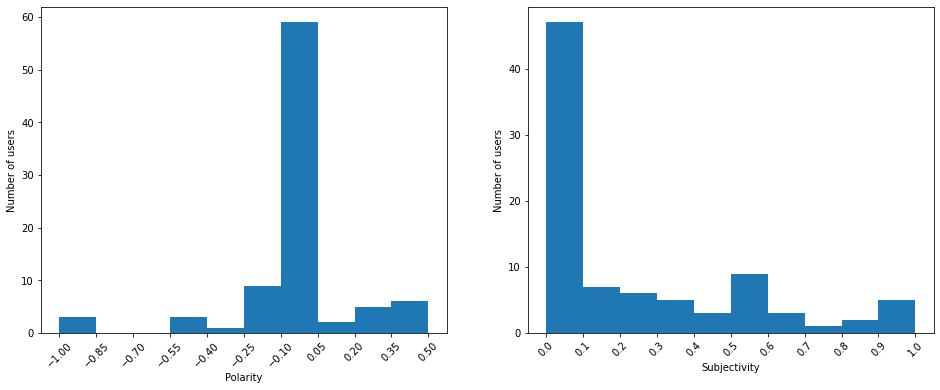

In [25]:
fig = plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
n, bins, patches = plt.hist(df_cleaned_final.Polarity)
plt.xticks(bins)
plt.ylabel('Number of users')
plt.xlabel('Polarity')
plt.xticks(rotation = 45)


plt.subplot(1, 2, 2) # index 2
n, bins, patches = plt.hist(df_cleaned_final.Subjectivity)
plt.xticks(bins)
plt.ylabel('Number of users')
plt.xlabel('Subjectivity')
plt.xticks(rotation = 45)


plt.show()